<h4>Chart on application comparison on Google Play & Apple store</h4>

Goal : 

<ul>
 <li>count the number of application downloaded <b>COMPLETED</b> </li>
    <li>Which Category has the most downloaded apps <b> COMPLETED </b> </li>
</ul> 
 
 Plot a bar chart & regression method to see the downloaded pattern 
 

In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
sns.set(style="whitegrid", color_codes=True)
sns.set(rc={'figure.figsize':(15,8)})

In [7]:
# Function to open file

def openfile(file_path):
    opened_file = open(file_path)
    from csv import reader
    read_file = reader(opened_file)
    return list(read_file)

openfile('../raw_data/googleplaystore.csv')

[['App',
  'Category',
  'Rating',
  'Reviews',
  'Size',
  'Installs',
  'Type',
  'Price',
  'Content Rating',
  'Genres',
  'Last Updated',
  'Current Ver',
  'Android Ver'],
 ['Photo Editor & Candy Camera & Grid & ScrapBook',
  'ART_AND_DESIGN',
  '4.1',
  '159',
  '19M',
  '10,000+',
  'Free',
  '0',
  'Everyone',
  'Art & Design',
  'January 7, 2018',
  '1.0.0',
  '4.0.3 and up'],
 ['Coloring book moana',
  'ART_AND_DESIGN',
  '3.9',
  '967',
  '14M',
  '500,000+',
  'Free',
  '0',
  'Everyone',
  'Art & Design;Pretend Play',
  'January 15, 2018',
  '2.0.0',
  '4.0.3 and up'],
 ['U Launcher Lite – FREE Live Cool Themes, Hide Apps',
  'ART_AND_DESIGN',
  '4.7',
  '87510',
  '8.7M',
  '5,000,000+',
  'Free',
  '0',
  'Everyone',
  'Art & Design',
  'August 1, 2018',
  '1.2.4',
  '4.0.3 and up'],
 ['Sketch - Draw & Paint',
  'ART_AND_DESIGN',
  '4.5',
  '215644',
  '25M',
  '50,000,000+',
  'Free',
  '0',
  'Teen',
  'Art & Design',
  'June 8, 2018',
  'Varies with device',
  '4.2 a

In [6]:
%%time
# Open file #2million Records
google = openfile('../raw_data/googleplaystore.csv')
apple = openfile('../raw_data/appleStore.csv')


#Extract data from raw format and assign to a list ( data value )
def data_extraction(data_set, index):
    column = []
    for row in data_set[1:]:
        value = row[index]
        column.append(value)
    return column
     
# Get the frequency of the selected value 
def freq_ratings(extracted_data_list):
    freq = {}
    for i in extracted_data_list:
        if i in freq:
            freq[i] += 1
        else:
            freq[i] = 1
    return freq       

CPU times: user 104 ms, sys: 17.9 ms, total: 122 ms
Wall time: 122 ms


[460 156 149 366 382 463 260 384 424  82]


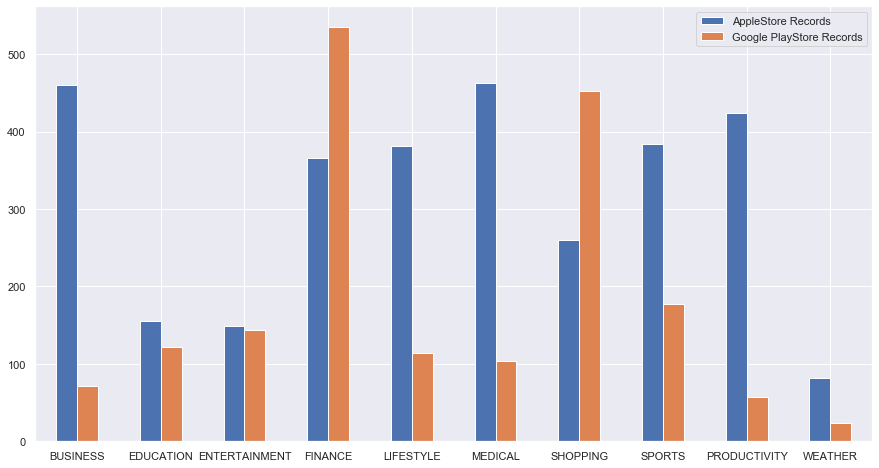

In [5]:
#set data to uppercase
def tabular(dataset, index):
    #Count Frequency 
    category = data_extraction(dataset,index)
    category_rating = freq_ratings(category)
    
    #Create tabular table : set all data to uppercase to match data
    category_rating = {x.upper():y for x,y in category_rating.items()}
    
    return pd.DataFrame(list(category_rating.items()), columns=['Category','Count'])

#Get common category
def common_category(dataframe_1, dataframe_2):
    data = np.intersect1d(dataframe_1.Category, np.intersect1d(dataframe_1.Category,dataframe_2.Category))
    return data
    
def createBarChart(df_1,df_2,cm_list):
    df1_arr = df_1[df_1['Category'].isin(cm_list)]
    df2_arr = df_2[df_2['Category'].isin(cm_list)]
    
    header = np.array(df1_arr['Category'])
    df_1 = np.array(df1_arr['Count'])
    df_2 = np.array(df2_arr['Count'])
    print(df_1)
    bar_chart = pd.DataFrame({'AppleStore Records': df_1,'Google PlayStore Records': df_2}, index=header)
    return bar_chart.plot.bar(rot=0)

df_g = tabular(google,1)
df_a = tabular(apple,11)
cm_list = common_category(df_a,df_g)

createBarChart(df_g,df_a,cm_list)


# df = df_g[df_g['Category'].isin(['BEAUTY','GAME'])]
# print(df_a.Category)
# np.intersect1d(df_g.Category, np.intersect1d(df_g.Category,df_a.Category))

